# Autoencoder in Keras

In [2]:
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

import matplotlib.pyplot as plt

from keras.datasets import mnist

## load MNIST data

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))
print('X train shape', x_train.shape, '; X test shape', x_test.shape)

X train shape (60000, 28, 28, 1) ; X test shape (10000, 28, 28, 1)


## create model

In [5]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) = 128

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

## train the model

In [7]:
hist = autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2011 - val_loss: 0.1625
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1510 - val_loss: 0.1396
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1388 - val_loss: 0.1357
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1325 - val_loss: 0.1331
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1276 - val_loss: 0.1235
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1239 - val_loss: 0.1215
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1215 - val_loss: 0.1230
Epoch 8/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1196 - val_loss: 0.1157
Epoch 9/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1180 - val_loss: 0.1164
Epoc

## predict

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

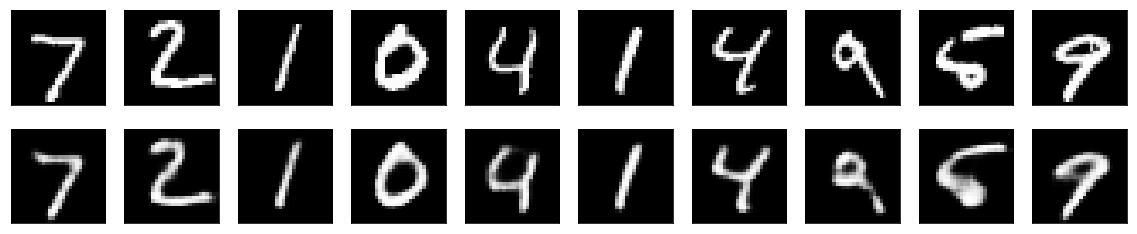

In [9]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()